## Chicago Airbnb Analysis Project

## Goal
Analyze Chicago Airbnb Listings to understand what drives:
- Price (nightly rate)
- Demand proxies (reviews, review scores)
- Listing performance by neighborhood / room type

## Dataset
- Source file: listings_chicago_clean.csv
- Notes: cleaned dataset (already pre-processed)

## Key Questions
1. What neighborhoods are most expensive (median price)?
2. How does price vary by room type (Entire home vs Private room)?
3. What features correlate most with price?
4. What drives higher review scores / review counts?
5. Can we build a model to predict price reasonably well?

## Deliverables
- 1 clean notebook (EDA → insights → model)
- 5-8 charts
- 3-5 resume bullets (business + tech impact()
- Optional: mini dashboard (later)

## Tech Stacks
Python, Pandas, NumPy, Matplotlib/Seaborn, Scikit-learn

In [1]:
import pandas as pd

raw_csv_data = pd.read_csv("listings_chicago_clean.csv")
df = raw_csv_data.copy()
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,bath
0,Hyde Park,41.787900,-87.587800,Private room,129,3,220,2.14,1,350,19,4.99,1,1,1
1,West Town,41.901660,-87.680210,Entire home/apt,94,32,493,2.90,1,295,44,4.70,1,1,1
2,West Lawn,41.782250,-87.728060,Private room,39,1,335,3.11,2,196,6,4.84,1,1,1
3,Logan Square,41.931150,-87.718360,Entire home/apt,100,32,27,0.22,4,198,3,4.73,3,6,1
4,Lincoln Park,41.911960,-87.639810,Entire home/apt,219,4,66,0.59,7,94,19,4.64,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8019,Edgewater,41.987116,-87.663194,Private room,75,1,0,NaN,23,355,0,New,1,1,1
8020,Uptown,41.954764,-87.651852,Entire home/apt,132,1,0,NaN,23,363,0,New,1,1,1
8021,Uptown,41.957153,-87.651080,Entire home/apt,121,1,0,NaN,23,359,0,New,0,1,1
8022,Avondale,41.934530,-87.720143,Entire home/apt,129,32,0,NaN,6,362,0,New,0,1,1


In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             8024 non-null   object 
 1   latitude                        8024 non-null   float64
 2   longitude                       8024 non-null   float64
 3   room_type                       8024 non-null   object 
 4   price                           8024 non-null   int64  
 5   minimum_nights                  8024 non-null   int64  
 6   number_of_reviews               8024 non-null   int64  
 7   reviews_per_month               6460 non-null   float64
 8   calculated_host_listings_count  8024 non-null   int64  
 9   availability_365                8024 non-null   int64  
 10  number_of_reviews_ltm           8024 non-null   int64  
 11  rating                          8024 non-null   object 
 12  bedrooms                        80

In [3]:
df.shape

(8024, 15)

In [4]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,bath
0,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2.14,1,350,19,4.99,1,1,1
1,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2.90,1,295,44,4.70,1,1,1
2,West Lawn,41.78225,-87.72806,Private room,39,1,335,3.11,2,196,6,4.84,1,1,1
3,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,0.22,4,198,3,4.73,3,6,1
4,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,0.59,7,94,19,4.64,2,2,1


In [5]:
df.isna().mean().sort_values(ascending=False).head(20)

reviews_per_month                 0.194915
neighbourhood_group               0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
rating                            0.000000
bedrooms                          0.000000
beds                              0.000000
bath                              0.000000
dtype: float64

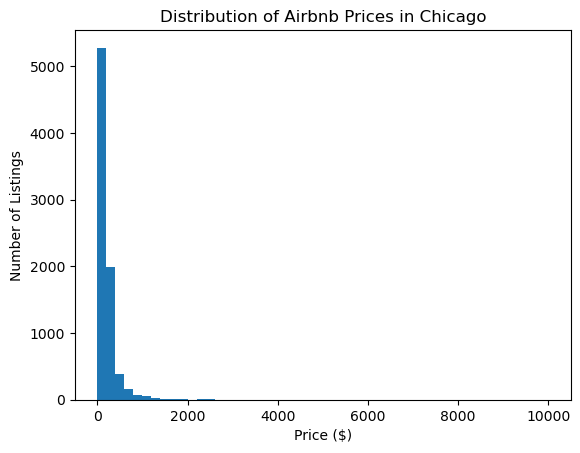

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['price'], bins=50)
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Airbnb Prices in Chicago')
plt.show()

In [7]:
df.groupby('room_type')['price'].median().sort_values()

room_type
Shared room         30.0
Private room        66.0
Entire home/apt    174.0
Hotel room         211.5
Name: price, dtype: float64

<Figure size 640x480 with 0 Axes>

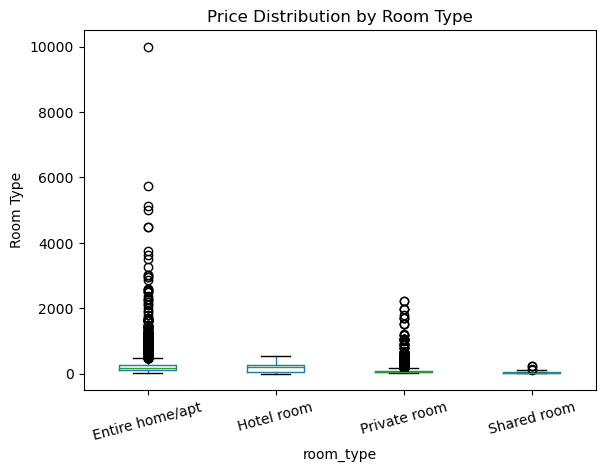

In [8]:
plt.figure()
df.boxplot(column='price', by='room_type', grid=False)
plt.xticks(rotation=15)
plt.ylabel('Room Type')
plt.title('Price Distribution by Room Type')
plt.suptitle('')
plt.show()

In [9]:
top_neighborhoods = (
    df.groupby('neighbourhood_group')['price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

top_neighborhoods


neighbourhood_group
Clearing           549.0
Near South Side    232.0
Oakland            225.0
Loop               213.5
Lincoln Park       206.0
Near North Side    205.5
Burnside           200.0
Ohare              197.5
North Center       183.5
South Deering      181.5
Name: price, dtype: float64

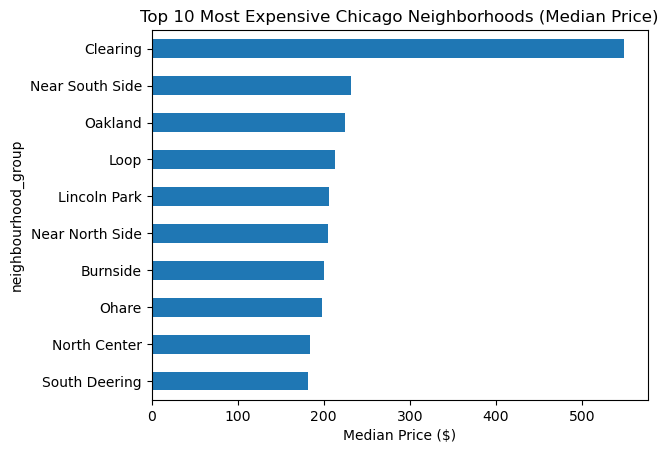

In [10]:
plt.figure()
top_neighborhoods.sort_values().plot(kind='barh')
plt.xlabel('Median Price ($)')
plt.title('Top 10 Most Expensive Chicago Neighborhoods (Median Price)')
plt.show()


In [11]:
df.isna().sum()

neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1564
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
rating                               0
bedrooms                             0
beds                                 0
bath                                 0
dtype: int64

In [12]:
df['neighbourhood_group'].value_counts().head(15)

neighbourhood_group
Near North Side    960
West Town          800
Lake View          610
Near West Side     513
Logan Square       452
Loop               416
Lincoln Park       305
Lower West Side    243
Near South Side    237
Uptown             205
Edgewater          196
Irving Park        177
Bridgeport         173
Avondale           165
Rogers Park        160
Name: count, dtype: int64

In [13]:
df[df['neighbourhood_group'] == 'Clearing']['price'].describe()

count     17.000000
mean     387.294118
std      212.137563
min       32.000000
25%      180.000000
50%      549.000000
75%      549.000000
max      549.000000
Name: price, dtype: float64

In [14]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
corr_with_price = numeric_cols.corr()['price'].sort_values(ascending=False)

corr_with_price


price                             1.000000
bedrooms                          0.463305
beds                              0.438805
longitude                         0.087919
availability_365                  0.084435
latitude                          0.041500
calculated_host_listings_count    0.001816
reviews_per_month                -0.037729
number_of_reviews_ltm            -0.042872
minimum_nights                   -0.045191
number_of_reviews                -0.058428
Name: price, dtype: float64

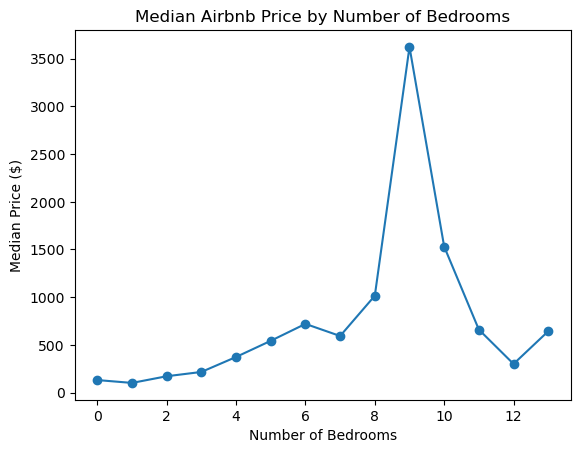

In [15]:
plt.figure()
df.groupby('bedrooms')['price'].median().plot(kind='line', marker='o')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Price ($)')
plt.title('Median Airbnb Price by Number of Bedrooms')
plt.show()


In [16]:
import numpy as np

df['log_price'] = np.log1p(df['price'])

df[['price', 'log_price']].head()

,price,log_price
0,129,4.867534
1,94,4.553877
2,39,3.688879
3,100,4.615121
4,219,5.393628


In [17]:
df['rating'] = pd.to_numeric(df['rating'],errors='coerce')

df['rating'].isna().sum()



np.int64(567)

In [18]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['rating'] = df['rating'].fillna(df['rating'].median())


In [19]:
features = [
    'bedrooms',
    'beds',
    'availability_365',
    'minimum_nights',
    'reviews_per_month',
    'rating',
    'latitude',
    'longitude'
]

X = df[features]
y = df['log_price']

X.head()

,bedrooms,beds,availability_365,minimum_nights,reviews_per_month,rating,latitude,longitude
0,1,1,350,3,2.14,4.99,41.78790,-87.58780
1,1,1,295,32,2.90,4.70,41.90166,-87.68021
2,1,1,196,1,3.11,4.84,41.78225,-87.72806
3,3,6,198,32,0.22,4.73,41.93115,-87.71836
4,2,2,94,4,0.59,4.64,41.91196,-87.63981


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((6419, 8), (1605, 8))

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = lr.predict(X_test)


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse


(0.38921486150949336, 0.45505913711815094, np.float64(0.602301858502183))

In [24]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr.coef_
}).sort_values(by='coefficient', ascending=False)

feature_importance


,feature,coefficient
7,longitude,4.880834
6,latitude,3.650181
0,bedrooms,0.216536
1,beds,0.116228
2,availability_365,0.000565
3,minimum_nights,-0.000800
4,reviews_per_month,-0.006389
5,rating,-0.038096


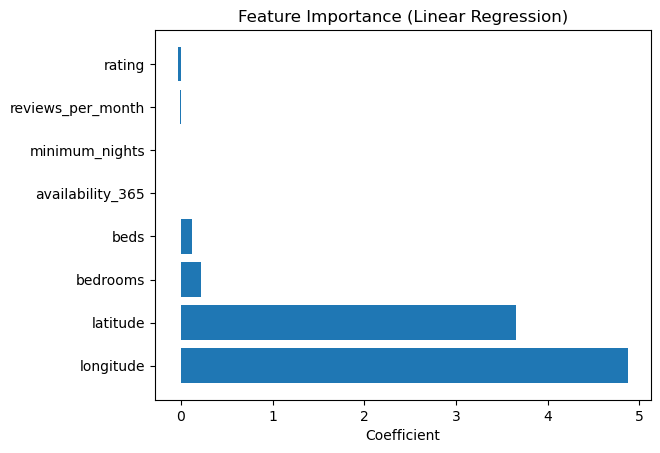

In [25]:
plt.figure()
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Coefficient')
plt.title('Feature Importance (Linear Regression)')
plt.show()
